# Enrollment (membership) data

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_column', 200)

In [3]:
enrollment0910 = pd.read_table('../../../data/NCES/schools/ccd_schools_universe_0910.txt', dtype={'NCESSCH': object, 'LATCOD09': object, 'LONCOD09': object})
# import combined school universe data file. We specify the type of specific variables to ensure they are not altered on importation

/home/fiendskrah/anaconda3/envs/seg_optimization/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (4,5,8,17,21,24,26,33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
enrollment0910.head()

,NCESSCH,FIPST,LEAID,SCHNO,STID09,SEASCH09,LEANM09,SCHNAM09,PHONE09,MSTREE09,MCITY09,MSTATE09,MZIP09,MZIP409,LSTREE09,LCITY09,LSTATE09,LZIP09,LZIP409,TYPE09,STATUS09,ULOCAL09,LATCOD09,LONCOD09,CONUM09,CONAME09,CDCODE09,FTE09,GSLO09,GSHI09,LEVEL09,TITLEI09,STITLI09,MAGNET09,CHARTR09,SHARED09,BIES09,FRELCH09,REDLCH09,TOTFRL09,RACECAT09,PK09,AMPKM09,AMPKF09,ASPKM09,ASPKF09,HIPKM09,HIPKF09,BLPKM09,BLPKF09,WHPKM09,WHPKF09,HPPKM09,HPPKF09,TRPKM09,TRPKF09,KG09,AMKGM09,AMKGF09,ASKGM09,ASKGF09,HIKGM09,HIKGF09,BLKGM09,BLKGF09,WHKGM09,WHKGF09,HPKGM09,HPKGF09,TRKGM09,TRKGF09,G0109,AM01M09,AM01F09,AS01M09,AS01F09,HI01M09,HI01F09,BL01M09,BL01F09,WH01M09,WH01F09,HP01M09,HP01F09,TR01M09,TR01F09,G0209,AM02M09,AM02F09,AS02M09,AS02F09,HI02M09,HI02F09,BL02M09,BL02F09,WH02M09,WH02F09,HP02M09,HP02F09,TR02M09,...,TR08M09,TR08F09,G0909,AM09M09,AM09F09,AS09M09,AS09F09,HI09M09,HI09F09,BL09M09,BL09F09,WH09M09,WH09F09,HP09M09,HP09F09,TR09M09,TR09F09,G1009,AM10M09,AM10F09,AS10M09,AS10F09,HI10M09,HI10F09,BL10M09,BL10F09,WH10M09,WH10F09,HP10M09,HP10F09,TR10M09,TR10F09,G1109,AM11M09,AM11F09,AS11M09,AS11F09,HI11M09,HI11F09,BL11M09,BL11F09,WH11M09,WH11F09,HP11M09,HP11F09,TR11M09,TR11F09,G1209,AM12M09,AM12F09,AS12M09,AS12F09,HI12M09,HI12F09,BL12M09,BL12F09,WH12M09,WH12F09,HP12M09,HP12F09,TR12M09,TR12F09,UG09,AMUGM09,AMUGF09,ASUGM09,ASUGF09,HIUGM09,HIUGF09,BLUGM09,BLUGF09,WHUGM09,WHUGF09,HPUGM09,HPUGF09,TRUGM09,TRUGF09,MEMBER09,AM09,AMALM09,AMALF09,ASIAN09,ASALM09,ASALF09,HISP09,HIALM09,HIALF09,BLACK09,BLALM09,BLALF09,WHITE09,WHALM09,WHALF09,PACIFIC09,HPALM09,HPALF09,TR09,TRALM09,TRALF09,TOTETH09
0,010000200277,1,100002,277,210,20,ALABAMA YOUTH SERVICES,SEQUOYAH SCH - CHALKVILLE CAMPUS,2056808574,P O BOX 9486,BIRMINGHAM,AL,35220,486.0,RT 2 OLD SPRINGVILLE RD,PINSON,AL,36126,486.0,4,1,41,33.699128,-86.606673,1073,JEFFERSON COUNTY,106,0.0,07,12,3,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,0
1,010000201402,1,100002,1402,210,25,ALABAMA YOUTH SERVICES,EUFAULA SCH - EUFAULA CAMPUS,3346874441,315 OUTBACK ROAD,CLAYTON,AL,36016,NaN,315 OUTBACK RD,CLAYTON,AL,36016,NaN,4,1,42,31.879475,-85.247080,1005,BARBOUR COUNTY,102,0.0,03,12,4,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,0
2,010000201667,1,100002,1667,210,50,ALABAMA YOUTH SERVICES,CAMPS,3342153850,P O BOX 66,MT MEIGS,AL,36057,NaN,M,MT MEIGS,AL,36057,NaN,4,1,41,32.387825,-86.100736,1101,MONTGOMERY COUNTY,103,0.0,07,12,3,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,-2,-2,-2,-2,-2,0
3,010000201670,1,100002,1670,210,60,ALABAMA YOUTH SERVICES,DET CTR,3342153850,P O BOX 66,MT MEIGS,AL,36057,NaN,M,MT MEIGS,AL,36057,NaN,4,1,41,32.387740,-86.100481,1101,MONTGOMERY COUNTY,103,0.0,07,12,3,N,N,M,N,M,2,-2,-2,-2,5,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,

### Indexing to San Diego County

See `locations.ipynb` for details on location indexing

In [9]:
sd0910 = enrollment0910.loc[enrollment0910['CONAME09'] == 'SAN DIEGO COUNTY']

In [11]:
sd0910 = gpd.GeoDataFrame(sd0910, geometry=gpd.points_from_xy(sd0910.LONCOD09, sd0910.LATCOD09)) 
# creating geometry from lat/lon

<AxesSubplot:>

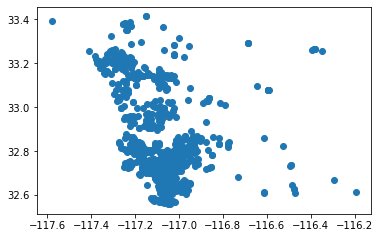

In [12]:
sd0910.plot()

link to the [flat codebook webpage](https://nces.ed.gov/ccd/data/txt/psu092alay.txt) to identify enrollment variables

In [20]:
attribute_names = list(sd0910.columns[42:])
print(attribute_names)

['AMPKM09', 'AMPKF09', 'ASPKM09', 'ASPKF09', 'HIPKM09', 'HIPKF09', 'BLPKM09', 'BLPKF09', 'WHPKM09', 'WHPKF09', 'HPPKM09', 'HPPKF09', 'TRPKM09', 'TRPKF09', 'KG09', 'AMKGM09', 'AMKGF09', 'ASKGM09', 'ASKGF09', 'HIKGM09', 'HIKGF09', 'BLKGM09', 'BLKGF09', 'WHKGM09', 'WHKGF09', 'HPKGM09', 'HPKGF09', 'TRKGM09', 'TRKGF09', 'G0109', 'AM01M09', 'AM01F09', 'AS01M09', 'AS01F09', 'HI01M09', 'HI01F09', 'BL01M09', 'BL01F09', 'WH01M09', 'WH01F09', 'HP01M09', 'HP01F09', 'TR01M09', 'TR01F09', 'G0209', 'AM02M09', 'AM02F09', 'AS02M09', 'AS02F09', 'HI02M09', 'HI02F09', 'BL02M09', 'BL02F09', 'WH02M09', 'WH02F09', 'HP02M09', 'HP02F09', 'TR02M09', 'TR02F09', 'G0309', 'AM03M09', 'AM03F09', 'AS03M09', 'AS03F09', 'HI03M09', 'HI03F09', 'BL03M09', 'BL03F09', 'WH03M09', 'WH03F09', 'HP03M09', 'HP03F09', 'TR03M09', 'TR03F09', 'G0409', 'AM04M09', 'AM04F09', 'AS04M09', 'AS04F09', 'HI04M09', 'HI04F09', 'BL04M09', 'BL04F09', 'WH04M09', 'WH04F09', 'HP04M09', 'HP04F09', 'TR04M09', 'TR04F09', 'G0509', 'AM05M09', 'AM05F09', 

These columns represent the race/ethnic and sex breakdown of students attending a given school.

In [26]:
sd0910.loc[sd0910['SCHNAM09'] == 'WARNER ELEMENTARY'].G0209

5983    20
Name: G0209, dtype: int64

The number 20 under the variable G2009 for the row corresponding to 'WARNER ELEMENTARY' means that there were 20 students enrolled in second grade. See the codebook and corresponding columns for demographic breakdowns. For example:

In [30]:
sd0910.loc[sd0910['SCHNAM09'] == 'WARNER ELEMENTARY'].HI02F09
# 5 hispanic female students

5983    5
Name: HI02F09, dtype: int64

In [33]:
sd0910.loc[sd0910['SCHNAM09'] == 'WARNER ELEMENTARY'].WH02M09
# 2 white male students

5983    2
Name: WH02M09, dtype: int64

### Let's do the same indexing for data year 1516

The later data years split the 'schools universe' file into seperate files, 'membership' and 'directory'. As a result, the membership file contains fields we can use to match enrollment data to the locations, but the locations must be loaded separately. 

In [4]:
enrollment1516 = pd.read_parquet('../../../data/NCES/schools/ccd_membership_1516.parquet')

In [96]:
locations1516 = gpd.read_parquet('edge_school_locations1516.parquet')

In [97]:
locations1516.head()

,NCESSCH,NAME,OPSTFIPS,LSTREE,LCITY,LSTATE,LZIP,LZIP4,STFIP15,CNTY15,NMCNTY15,LOCALE15,LAT1516,LON1516,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15,geometry
0,010000200277,Sequoyah Sch - Chalkville Campus,01,1000 Industrial School Road,Birmingham,AL,35220,M,01,01073,Jefferson County,21,33.673661,-86.628755,13820,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,0106,044,020,POINT (-86.62875 33.67366)
1,010000201667,Camps,01,1601 County Rd. 57,Prattville,AL,36067,M,01,01001,Autauga County,41,32.521681,-86.530132,33860,"Montgomery, AL",1,N,N,N,N,0102,042,030,POINT (-86.53013 32.52168)
2,010000201670,Det Ctr,01,2109 Bashi Rd Bldg 509,Thomasville,AL,36784,M,01,01025,Clarke County,41,31.938444,-87.750529,N,N,N,N,N,N,N,0107,068,024,POINT (-87.75053 31.93844)
3,010000201705,Wallace Sch - Mt Meigs Campus,01,1000 Industrial School Road,Mount Meigs,AL,36057,M,01,01101,Montgomery County,41,32.374812,-86.082360,33860,"Montgomery, AL",1,N,N,N,N,0103,075,025,POINT (-86.08236 32.37481)
4,010000201706,McNeel Sch - Vacca Campus,01,8950 Roebuck Blvd,Birmingham,AL,35206,M,01,01073,Jefferson County,12,33.583385,-86.710058,13820,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,0107,058,020,POINT (-86.71006 33.58338)


Key to this process is the NCESSCH ID

In [98]:
enrollment1516.NCESSCH
# we lose the zero on states with a single digit FIPS code. Let's resolve that before moving on

0        010000200277
1        010000201667
2        010000201670
3        010000201705
4        010000201706
             ...     
99259    780003000025
99260    780003000026
99261    780003000027
99262    780003000033
99263    780003000034
Name: NCESSCH, Length: 99264, dtype: object

In [99]:
enrollment1516['NCESSCH'] = enrollment1516['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
# front fills to 12 digits with zero. only first 9 states should be affected (including California)

No we can index beforehand to minimize the processing power required for the merge. 

In [101]:
sd_county = locations1516.loc[locations1516['NMCNTY15'] == 'San Diego County']
# indexing locations to SD county

In [103]:
sd_county.shape
# 767 schools

(767, 25)

In [104]:
select_enroll = enrollment1516.loc[enrollment1516['NCESSCH'].isin(sd_county['NCESSCH'])]
# select schools contained in sd_county gdf

In [108]:
select_enroll.shape

(750, 289)

Some records will be lost in this process. 

In [109]:
merged = sd_county.merge(select_enroll, on='NCESSCH', how='left')
# perform the merge

Now we have location data merged with the enrollment attribute data in a single geodataframe. 

<AxesSubplot:>

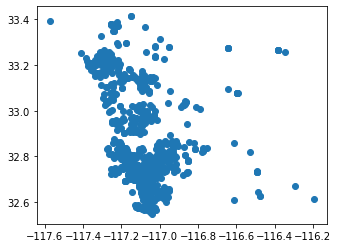

In [110]:
merged.plot()

In [111]:
merged.head()

,NCESSCH,NAME,OPSTFIPS,LSTREE,LCITY,LSTATE,LZIP,LZIP4,STFIP15,CNTY15,NMCNTY15,LOCALE15,LAT1516,LON1516,CBSA15,NMCBSA15,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15,geometry,SURVYEAR,FIPST,STABR,STATENAME,SEANAME,LEAID,LEA_NAME,SCHID,ST_SCHID,SCH_NAME,PK,KG,G01,G02,G03,G04,G05,G06,G07,G08,G09,G10,G11,G12,G13,UG,AE,TOTAL,MEMBER,AMPKM,AMPKF,ASPKM,ASPKF,HIPKM,HIPKF,BLPKM,BLPKF,WHPKM,WHPKF,HPPKM,HPPKF,TRPKM,TRPKF,AMKGM,AMKGF,ASKGM,ASKGF,HIKGM,HIKGF,BLKGM,BLKGF,WHKGM,WHKGF,HPKGM,HPKGF,TRKGM,TRKGF,AM01M,AM01F,AS01M,AS01F,HI01M,HI01F,BL01M,BL01F,WH01M,WH01F,HP01M,HP01F,TR01M,TR01F,AM02M,AM02F,AS02M,AS02F,...,HI10F,BL10M,BL10F,WH10M,WH10F,HP10M,HP10F,TR10M,TR10F,AM11M,AM11F,AS11M,AS11F,HI11M,HI11F,BL11M,BL11F,WH11M,WH11F,HP11M,HP11F,TR11M,TR11F,AM12M,AM12F,AS12M,AS12F,HI12M,HI12F,BL12M,BL12F,WH12M,WH12F,HP12M,HP12F,TR12M,TR12F,AM13M,AM13F,AS13M,AS13F,HI13M,HI13F,BL13M,BL13F,WH13M,WH13F,HP13M,HP13F,TR13M,TR13F,AMUGM,AMUGF,ASUGM,ASUGF,HIUGM,HIUGF,BLUGM,BLUGF,WHUGM,WHUGF,HPUGM,HPUGF,TRUGM,TRUGF,AMAEM,AMAEF,ASAEM,ASAEF,HIAEM,HIAEF,BLAEM,BLAEF,WHAEM,WHAEF,HPAEM,HPAEF,TRAEM,TRAEF,AM,AMALM,AMALF,AS,ASALM,ASALF,HI,HIALM,HIALF,BL,BLALM,BLALF,WH,WHALM,WHALF,HP,HPALM,HPALF,TR,TRALM,TRALF
0,060004205341,Warner Junior/Senior High,06,30951 Highway 79,Warner Springs,CA,92086,M,06,06073,San Diego County,42,33.275248,-116.642924,41740,"San Diego-Carlsbad, CA",1,N,N,N,N,0650,071,038,POINT (-116.64292 33.27525),2015-2016,6.0,CA,CALIFORNIA,California Department of Education,600042.0,Warner Unified,5341.0,3775416-3730975,Warner Junior/Senior High,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,18.0,21.0,14.0,15.0,17.0,10.0,-2.0,-2.0,-2.0,95.0,95.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,1.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,3.0,5.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,26.0,13.0,13.0,0.0,0.0,0.0,36.0,18.0,18.0,1.0,0.0,1.0,29.0,13.0,16.0,1.0,0.0,1.0,2.0,0.0,2.0
1,060004206527,San Jose Valley Continuation Hig,06,30951 Highway 79,Warner Springs,CA,92086,M,06,06073,San Diego County,42,33.275248,-116.642924,41740,"San Diego-Carlsbad, CA",1,N,N,N,N,0650,071,038,POINT (-116.64292 33.27525),2015-2016,6.0,CA,CALIFORNIA,California Department of Education,600042.0,Warner Unified,6527.0,3775416-3731015,San Jose Valley Continuation High,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,060004206844,Warner Elementary,06,30951 Highway 79,Warner Springs,CA,92086,0008,06,06073,San Diego County,42,33.275248,-116.642924,41740,"San Diego-Carlsbad, CA",1,N,N,N,N,0650,071,038,POINT (-116.64292 33.27525),2015-2016,6.0,CA,CALIFORNIA,California Department of Education,600042.0,Warner Unified,6844.0,3775416-6040661,Warner Elementary,-2.0,23.0,9.0,13.0,17.0,13.0,12.0,23.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,110.0,110.0,-2.0,-2.0,-2.0,-2.0,-

Let's check in on Warner Elementary's second grade

In [113]:
merged.loc[merged['NAME'] == 'Warner Elementary'].G02
# 13 students

2    13.0
Name: G02, dtype: float64

In [117]:
merged.loc[merged['NAME'] == 'Warner Elementary'].HI02F
# 1 hispanic female student

2    1.0
Name: HI02F, dtype: float64

In [118]:
merged.loc[merged['NAME'] == 'Warner Elementary'].WH01M
# 1 white male student

2    1.0
Name: WH01M, dtype: float64

### Alternate source: Urban Institute

We also found that we were able to download enrollment data through the Urban Institute's API.

**we decided to proceed with our own cleaning methods and do not use UI for the analysis.**

In [8]:
from json import loads
from urllib.request import urlopen

In [9]:
url = "https://educationdata.urban.org/api/v1/school-districts/ccd/enrollment/2018/grade-8/"

In [10]:
response = urlopen(url)
data = loads(response.read())
data = pd.DataFrame.from_dict(data)
dfdict = dict(data['results'])
data = pd.DataFrame.from_dict(dfdict, orient='index')

In [11]:
data.head()

,year,leaid,fips,grade,race,sex,enrollment
0,2018,0100002,1,8,99,99,NaN
1,2018,0100005,1,8,99,99,403.0
2,2018,0100006,1,8,99,99,463.0
3,2018,0100007,1,8,99,99,1076.0
4,2018,0100008,1,8,99,99,900.0
